## 1. Definição do Problema
Uma empresa que oferece empréstimo a pessoas físicas, necessita saber, com base nos dados de seus clientes, quais novos clientes poderão ou não ter acesso ao crédito solicitado (empréstimo).

Pensando no problema da empresa, iremos criar um modelo utilizando *Machine Learning*, com base nas informações históricas dos clientes dessa empresa (cliente que pediram empréstimo que pagaram e que não pagaram), onde o objetivo é com base nesse histórico, prevermos se possíveis novos clientes irão ou não arcar com seus compromissos.

O produto final será uma aplicação web, onde a entrada são os dados do possível novo cliente e com base nesses dados, o modelo irá informar se pode ou não liberar o crédito solicitado.

> **Observação**: *Essa é uma das fases mais importantes de um projeto de Machine Learning (ou de qualquer tipo de projeto), devemos entender a situação, fazer as devidas documentações (análises de requisitos e etc). Se essa fase não for tratada com a devida importância o projeto pode tender a ter problemas futuros.*








## 2. Preparação dos Dados

Importando as bibliotecas padrões que iremos utilizar durante o projeto

In [1]:
import os
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Carregando a Fonte de Dados (Análise de Crédito)
Importando a fonte de dados, aqui por ser um exemplo, será carregado de um arquivo .csv, mas no mundo real pode vir de diversas outros formatos e tipos, como por exemplo de um banco de dados.

# 
*  *.csv (“comma-separated-values” - valores separados por vírgulas)

In [2]:
data = pd.read_csv('loan.csv')

Abaixo, iremos verificar como está dispostos nossos dados, iremos ver as 5 primeiras linhas.

*Podemos observar algumas colunas categóricas (`Gender`, `Married`, `Dependents`, `Education`...), discretas (`ApplicantIncome`) e outras contínuas (`CoapplicantIncome`, `LoanAmount`...).*

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Com o comando abaixo, iremos verificar os Quantidade de Linhas e Colunas, Tipos das Colunas, Tamanho entre outras informações.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Verificando o balanceamento dos Labels (Y - Aprovado, N - Negado), basicamente contamos a quantidade de registros da variável Target: a coluna `Loan_Status`.

Observamos que tem um desbalançeamento das classes...

In [5]:
data.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

Vamos dar uma equilibrada, reduzindo o valor de Aprovados (Y), vamos pegar apenas 200 (existem diversas outras técnicas para tratar classes desbalançeadas, como podemos ver em [Imbalanced Classification].

In [6]:
data2 = data[data.Loan_Status=='Y'].sample(200)

Abaixo, anexa as 200 amostras da **classe Y** com os registros da **classe N**, em um dataframe que chamamos de **data**

Verificando novamente o equilíbrio entre as classes.

In [7]:
data.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Checando Missing Values (Valores nulos)
Agora vamos analisar as colunas para ver se encontramos valores nulos.

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Podemos observar que temos algumas colunas contendo valores nulos, como por exemplo: `Gender`, `Married`, `Dependents`, `Credit_History` e etc.

Existem algumas técnicas para preenchimento de valores nulos, no nosso projeto, iremos utilizar dois tipos:
- Valor Majoritário (assume o valor majoritário da variável e adiciona nos registros nulos;
- Valor Médio (calcula a média dos valores da variável e adiciona nos registros nulos).

Preenchendo Missing Values:

- `Dependents`: Assumindo o valor majoritário.
- `Self_Employed`: Assumindo o valor majoritário.
- `Loan_Amount_Term`: Preenchendo com o valor médio.
- `Credit_History`: Assumindo o valor majoritário.
- `Married`: Assumindo o valor majoritário.
- `Gender`: Assumindo o valor majoritário.

Seguem os comandos...

In [9]:
# Exemplo - Contagem de tipos de Generos
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
data['Gender'] = data['Gender'].fillna('Male')

In [11]:
data['Married'] = data['Married'].fillna('No')

In [12]:
data['Dependents'] = data['Dependents'].fillna('0')

In [13]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')

In [14]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [15]:
# Exemplo - Contagem de tipos de Generos
data.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [16]:
data['Credit_History'] = data['Credit_History'].fillna(1.0)

In [17]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

#### Checando novamente Missing Values
Após a execução dos comandos acima, vamos verificar novamente se as colunas contém valores nulos.

*Veremos no resultado do comando abaixo que não temos mais valores nulos em nenhuma das colunas.*

In [18]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Transformando dados categóricos

Antes de continuar, vamos só contextualizar alguns termos, que já usamos anteriormente e iremos usar a seguir:

**O que são variávies categóricas?** É uma variável estatística, medida em uma escala nominal, cujas categorias identifiquem a sociedade da classe ou de grupo.

**O que são variávies discretas e contínuas?** 

**Dicretas** quando o conjunto de resultados possíveis é finito ou enumerável. Exemplo: número de filhos, alunos numa escola etc.

**Contínuas** quando os valores são expressos como intervalo ou união de números reais. Exemplo: peso, massa, altura, pressão sistólica, idade , nível de açúcar no sangue.


---

Várias colunas do dataframe (data) são categóricas, precisamos transforma-las em discretas ("discretiza-las"), são elas: `Gender`, `Married`, `Education`, `Self_Employed`, `Dependents` e `Loan_Status`.

Existem algumas bibliotecas que fazem esse mapeamento, como por exemplo: [LabelEncoder] e , mas aqui, por serem poucas iremos mapear na mão mesmo até pra ter um entendimento maior do que se trata esse processo de transformar dados categóricos em discretos.

Realizando os mapeamentos e substituindo os valores das colunas no dataframe (data)

In [19]:
gender_values = {'Female' : 0, 'Male' : 1} 
married_values = {'No' : 0, 'Yes' : 1}
education_values = {'Graduate' : 0, 'Not Graduate' : 1}
employed_values = {'No' : 0, 'Yes' : 1}
dependent_values = {'3+': 3, '0': 0, '2': 2, '1': 1}
loan_values = {'Y':1,'N':0}
data.replace({'Gender': gender_values,
                 'Married': married_values, 
                 'Education': education_values,
                 'Self_Employed': employed_values, 
                 'Dependents': dependent_values,
                 'Loan_Status': loan_values
                }, inplace=True)

### Seleção de *Features*
A seleção de atributos (colunas) é uma fase bastante importante para o projeto de Machine Learning, saber quais atributos utilizar para gerar um melhor ganho para seu modelo é visto como uma arte! Esse processo exige diversos testes e simulações.

Existem também ferramentas e técnicas (como por exemplo, correlação entre variáveis e etc) que podem ajudar nisso, aqui iremos pelo conhecimento do conjunto de dados utilizado e iremos excluir as seguintes features (atributos): `Loan_ID`,`CoapplicantIncome`,`Loan_Amount_Term`,`Credit_History`,`Property_Area` esses atributos não agregam muito para a criação do modelo.



Executando o comando drop para realizar essa exclusão

In [20]:
data.drop(['Loan_ID','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area'],axis=1,inplace=True)

Vamos verificar como ficou o dataframe após a nossa seleção de atributos (*features*)

In [21]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,1,0,0,0,0,5849,146.412162,1
1,1,1,1,0,0,4583,128.000000,0
2,1,1,0,0,1,3000,66.000000,1
3,1,1,0,1,0,2583,120.000000,1
4,1,0,0,0,0,6000,141.000000,1


Pronto, agora todas as colunas (features) são discretas ou contínuas...

Vamos agora para a criação do modelo.

## 3. Criando o Modelo de *Machine Learning*

Um modelo de *machine learning* é um arquivo que foi treinado para reconhecer determinados tipos de padrões. Você treina um modelo em um conjunto de dados, fornecendo a ele um algoritmo que pode ser usado para ponderar e aprender com esses dados. 

Utilizaremos a biblioteca scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python.Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy. 

Esse problema que estamos tratando é um **Problema de Classificação**, e iremos utilizar o algoritmo *Random Forest*,*SVM*,*GRADIENT BOOSTNG*,*KNN*,*Árvore de Decisão*, *XGBoost* e *Regressão Logística*

Essa fase também exige bastante testes de classificadores para encontrar aquele que melhor se enquadra em seus dados.


Abaixo importamos as bibliotecas do algoritmo mencionado acima e também importamos uma biblioteca que divide o modelo em conjunto de treinamento e teste (*train_test_split*)

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score

TREINAMENTO E AVALIAÇÂO
Treinamos múltiplos modelos com ajuste de hiperparâmetros e utilizamos um ensemble de empilhamento (stacking) para as previsões finais.


In [38]:
# 1. Transformar o Alvo (Y/N -> 1/0)
le = LabelEncoder()
y = le.fit_transform(data['Loan_Status'])
X = data.drop('Loan_Status', axis=1)

# Se houver colunas de texto no X, você precisa de um pd.get_dummies(X) aqui!
X = pd.get_dummies(X, drop_first=True)

# 2. Split dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 3. Criar a versão escalonada (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Definir os modelos e hiperparâmetros
models = {
    'Regressão Logística': {
        'model': LogisticRegression(max_iter=3000, random_state=42),
        'use_scaled': True,
        'params': {
            'C': np.logspace(-4, 4, 20),
            'solver': ['lbfgs', 'liblinear'],
            'penalty': ['l2']
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'use_scaled': True,
        'params': {
            'C': np.logspace(-3, 3, 20),
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto', 0.1, 1]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'use_scaled': False,
        'params': {
            'n_estimators': [100, 150, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced', None]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'use_scaled': False,
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'use_scaled': True,
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Árvore de Decisão': {
        'model': DecisionTreeClassifier(random_state=42),
        'use_scaled': False,
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced', None]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'use_scaled': False,
        'params': {
            'n_estimators': [100, 150],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

# Configurações comuns
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted', 'Accuracy': 'accuracy'}

In [55]:
from sklearn.metrics import accuracy_score 

results = {}

for model_name, config in models.items():
    print(f"\n=== Treinando {model_name} ===")

    # 1. Selecionar dados corretos (Escalonados ou Originais)
    xtr = X_train_scaled if config['use_scaled'] else X_train
    xte = X_test_scaled if config['use_scaled'] else X_test

    # 2. Busca de hiperparâmetros
    search = RandomizedSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        n_iter=15, 
        cv=cv,
        scoring='f1_weighted', # Critério principal para o refit
        refit=True,
        n_jobs=-1,
        random_state=42
    )

    search.fit(xtr, y_train)
    
    # 3. Avaliação do Melhor Modelo encontrado
    best_model = search.best_estimator_
    y_pred = best_model.predict(xte)
    
    # Lógica para probabilidade (necessária para o AUC)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(xte)[:, 1]
    else:
        y_proba = y_pred # Fallback para modelos sem predict_proba

    # 4. Cálculo das Métricas
    current_f1 = f1_score(y_test, y_pred, average='weighted')
    current_acc = accuracy_score(y_test, y_pred)
    current_auc = roc_auc_score(y_test, y_proba)

    # 5. Armazenar tudo no dicionário results
    results[model_name] = {
        'F1-Score': current_f1,
        'Accuracy': current_acc,
        'AUC': current_auc,
        'params': search.best_params_
    }
    
    # Print imediato para acompanhar o treino
    print(f"Melhor F1: {current_f1:.4f} | Acurácia: {current_acc:.4f}")

# --- DICA: Para ver a tabela final após o loop ---
# df_final = pd.DataFrame(results).T[['F1-Score', 'Accuracy', 'AUC']].sort_values(by='F1-Score', ascending=False)
# print(df_final)


=== Treinando Regressão Logística ===
Melhor F1: 0.5126 | Acurácia: 0.6504

=== Treinando SVM ===
Melhor F1: 0.6306 | Acurácia: 0.6585

=== Treinando Random Forest ===
Melhor F1: 0.5446 | Acurácia: 0.6098

=== Treinando Gradient Boosting ===
Melhor F1: 0.5597 | Acurácia: 0.6098

=== Treinando KNN ===
Melhor F1: 0.5661 | Acurácia: 0.6423

=== Treinando Árvore de Decisão ===
Melhor F1: 0.5655 | Acurácia: 0.5935

=== Treinando XGBoost ===
Melhor F1: 0.5304 | Acurácia: 0.6341


Podemos ver que o modelo de Regressão Logística teve as melhores métricas F1: 0.5126 | Acurácia: 0.6504

Iremos utilizar o **crosstab** para visualizar as classificações.

Onde veremos a proporção de acertos, comparando o que foi **Predito** com o **Real**.

In [56]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Criar o Pipeline (Escalonamento + Modelo)
# Isso garante que o StandardScaler aprenda apenas com os dados de treino de cada Fold
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=1.0, solver='liblinear', random_state=42)) 
    # ^ Use os melhores parâmetros que o seu GridSearchCV encontrou aqui
])

# 2. Executar a Validação Cruzada (K-Fold)
# Vamos testar a estabilidade do F1-Score em 10 dobras diferentes
cv_scores = cross_val_score(pipeline_logreg, X, y, cv=10, scoring='f1_weighted')

print(f"=== Estatísticas da Validação Cruzada (10 Folds) ===")
print(f"F1-Scores por Fold: {cv_scores}")
print(f"Média do F1: {cv_scores.mean():.4f}")
print(f"Desvio Padrão: {cv_scores.std():.4f} (Quanto menor, mais estável é o modelo)")

# 3. Gerar previsões "fora da amostra" para o Crosstab
y_pred_cv = cross_val_predict(pipeline_logreg, X, y, cv=10)

# 4. Criar o Crosstab (Matriz de Confusão detalhada)
ct = pd.crosstab(y, y_pred_cv, rownames=['Real'], colnames=['Previsto'], margins=True)

print("\n=== Crosstab: Validação Cruzada (Real vs Previsto) ===")
print(ct)

=== Estatísticas da Validação Cruzada (10 Folds) ===
F1-Scores por Fold: [0.56804916 0.56804916 0.5313093  0.5471464  0.5615152  0.5615152
 0.5615152  0.56955874 0.55351977 0.5615152 ]
Média do F1: 0.5584
Desvio Padrão: 0.0111 (Quanto menor, mais estável é o modelo)

=== Crosstab: Validação Cruzada (Real vs Previsto) ===
Previsto  0    1  All
Real                 
0         1  191  192
1         6  416  422
All       7  607  614


Fazendo o Fine Tunning do modelo

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1. Definimos o Pipeline para evitar vazamento de dados
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=5000))
])

# 2. Ajustamos o espaço de busca (O FINE-TUNING)
# Note que aumentamos o valor de C para evitar os coeficientes zerados
param_grid = {
    'model__C': [0.1, 1.0, 10.0, 100.0], 
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}

# 3. Executamos a busca pelo melhor parâmetro
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X, y) # Usamos X e y brutos porque o Pipeline escala sozinho

# 4. Resultados do Fine-tuning
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor F1-Score: {grid_search.best_score_:.4f}")

# 5. EXTRAINDO OS PESOS (Sem estarem zerados!)
melhor_modelo = grid_search.best_estimator_.named_steps['model']
pesos = pd.DataFrame({
    'Atributo': X.columns,
    'Peso': melhor_modelo.coef_[0]
}).sort_values(by='Peso', ascending=False)

print("\n=== Pesos das Variáveis (Interpretável) ===")
print(pesos)

Melhores parâmetros: {'model__C': 1.0, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Melhor F1-Score: 0.5639

=== Pesos das Variáveis (Interpretável) ===
          Atributo      Peso
1          Married  0.215334
5  ApplicantIncome  0.047514
4    Self_Employed  0.003046
0           Gender -0.012443
2       Dependents -0.017472
6       LoanAmount -0.165035
3        Education -0.202860


Calculando a Razão de Chances (Exponencial dos coeficientes)

In [63]:
import numpy as np

# Calculando a Razão de Chances (Exponencial dos coeficientes)
pesos['Odds_Ratio'] = np.exp(pesos['Peso'])

print("\n=== Interpretação por Razão de Chances (Odds Ratio) ===")
print(pesos[['Atributo', 'Odds_Ratio']])


=== Interpretação por Razão de Chances (Odds Ratio) ===
          Atributo  Odds_Ratio
1          Married    1.240276
5  ApplicantIncome    1.048660
4    Self_Employed    1.003051
0           Gender    0.987634
2       Dependents    0.982680
6       LoanAmount    0.847864
3        Education    0.816393


Vamos agora gerar um **Relatório de Classificação**, ele nos mostra com mais detalhes algumas métricas importantes, tais como: *precision, recall, f1-score*...

In [64]:
from sklearn.metrics import classification_report

print("=== Relatório de Classificação: Regressão Logística (Pós Fine-Tuning) ===")

# Usando o melhor modelo encontrado no seu Grid Search
try:
    # O best_estimator_ já faz o escalonamento automático dos dados de teste
    y_pred_final = grid_search.best_estimator_.predict(X_teste)
    
    # Gerando o relatório
    print(classification_report(y_teste, y_pred_final))
    
except NameError:
    print("Erro: O objeto 'grid_search' ou 'X_teste' não foi encontrado. Execute o bloco do Fine-Tuning primeiro.")

=== Relatório de Classificação: Regressão Logística (Pós Fine-Tuning) ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



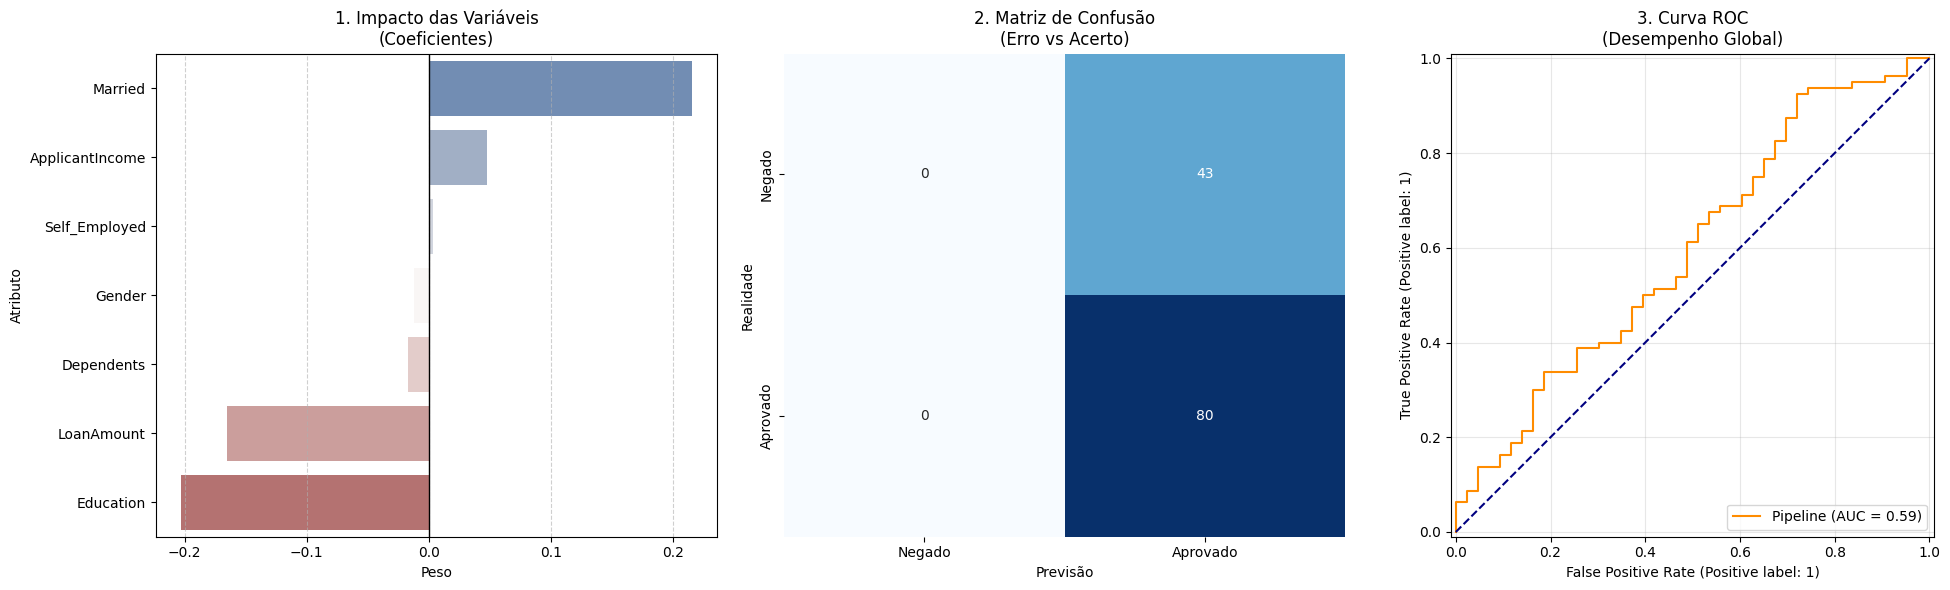

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, confusion_matrix

# Criando a moldura: 1 linha e 3 colunas
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# --- GRÁFICO 1: Importância das Variáveis (Pesos) ---
sns.barplot(data=pesos, x='Peso', y='Atributo', ax=ax[0], palette='vlag')
ax[0].set_title('1. Impacto das Variáveis\n(Coeficientes)', fontsize=12)
ax[0].axvline(x=0, color='black', linestyle='-', linewidth=1)
ax[0].grid(axis='x', linestyle='--', alpha=0.6)

# --- GRÁFICO 2: Matriz de Confusão ---
cm = confusion_matrix(y_teste, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negado', 'Aprovado'], 
            yticklabels=['Negado', 'Aprovado'], ax=ax[1], cbar=False)
ax[1].set_title('2. Matriz de Confusão\n(Erro vs Acerto)', fontsize=12)
ax[1].set_ylabel('Realidade')
ax[1].set_xlabel('Previsão')

# --- GRÁFICO 3: Curva ROC ---
RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_teste, y_teste, 
                               ax=ax[2], color='darkorange')
ax[2].plot([0, 1], [0, 1], color='navy', linestyle='--')
ax[2].set_title('3. Curva ROC\n(Desempenho Global)', fontsize=12)
ax[2].grid(True, alpha=0.3)

# Ajuste final para não sobrepor os textos
plt.tight_layout()
plt.show()

## 4. Colocando em Produção
Aqui iremos colocar pra funcionar o nosso modelo, iremos criar uma página da web bem simples para realizar os devidos testes.

### Persistindo o modelo de Machine Learning para o disco.

Antes, vamos persistir nosso modelo para o disco! Utilizaremos a biblioteca **joblib** (que importaremos a seguir)

Para que estou fazendo isso? Para mandar o modelo persistido para meu servidor web.

In [66]:
import joblib

modelo_producao = grid_search.best_estimator_

# 2. Salvamos o arquivo .pkl
joblib.dump(modelo_producao, 'modelo_regressao_logistica.pkl')


['modelo_regressao_logistica.pkl']

Persistindo o modelo em disco com o comando *dump* do **joblib**.

In [67]:
joblib.dump(modelo_producao, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

#### Carregando o modelo a partir do disco para a memória no servidor Web

In [69]:
model = joblib.load('model\modelo_regressao_logistica.pkl')

Vamos verificar os atributos do modelo...

In [73]:
model_pipeline = joblib.load(r'model\modelo_regressao_logistica.pkl')


if hasattr(model_pipeline, 'named_steps'):
    log_reg = model_pipeline.named_steps['model']
else:
    log_reg = model_pipeline # Caso tenha salvo apenas o modelo puro

print("=== Atributos do Modelo de Regressão Logística ===")
print(f"Classes: {log_reg.classes_}")
print(f"Coeficientes (Pesos): {log_reg.coef_}")
print(f"Intercepto (Bias): {log_reg.intercept_}")
print(f"Parâmetros: {log_reg.get_params()}")

=== Atributos do Modelo de Regressão Logística ===
Classes: [0 1]
Coeficientes (Pesos): [[-0.01244325  0.21533367 -0.01747158 -0.20285988  0.00304636  0.04751355
  -0.16503504]]
Intercepto (Bias): [0.79676308]
Parâmetros: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.0, 'max_iter': 5000, 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Tudo OK, agora vamos testar!

### Teste de Classificação
Vamos criar um teste, como se fosse a entrada de dados da nossa página da Web (imagem no final do arquivo)

Na página devemos informar algumas informações dos possíveis clientes, como: 
- Sexo (Masculino(1) e Feminino(0))
- Número de Dependentes
- Casado (Sim(1) ou Não(0))
- Grau de Instrução (Graduado(1) ou Não Graduado(0))
- Trabalha por conta própria (Sim(1) ou Não(2))
- Rendimento (rendimentos do cliente)
- Valor do Emprestimo (valor que o cliente quer emprestado)

A ordem que vai para o modelo é: Gender(Sexo), Married (Casado), Dependents (Número de Dependentes), Education (Grau de Instrução), Self_Employed (Trabalha por conta própria), ApplicantIncome (Rendimentos) e	LoanAmount (Valor do Emprestimo)

Realizando um testes com as seguintes informações:
- Gender(Sexo) = 1
- Married (Casado) = 1
- Dependents (Número de Dependentes) = 3
- Education (Grau de Instrução) = 0
- Self_Employed (Trabalha por conta própria) = 0
- ApplicantIncome (Rendimentos) = 9504
- LoanAmount (Valor do Emprestimo) = 275

In [74]:
teste = np.array([[1,1,3,0,0,9504,275.0]])

Rondando o Modelo pra prever o teste que fizemos:

In [75]:
model_pipeline.predict(teste)

array([1])

O Modelo nos retornou as seguintes probabilidades:

In [76]:
model_pipeline.predict_proba(teste)

array([[0.31096134, 0.68903866]])

 Como a probabilidade da Classe 1 ($68,9\%$) é maior que a da Classe 0 ($31,1\%$), o comando model.predict() retornaria 1 (Aprovado